In [1]:
# импортируем все нужные базовые библиотеки
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# use with internet connection
df = pd.read_csv("https://github.com/le-zenith/response-modelling/raw/master/dataset.csv", sep = ";")

In [3]:
# избавимся от пропущенных значений
df = df.dropna()

In [4]:
# проверим размерность после очищения от пропусков
df.shape

(582220, 47)

In [5]:
# для catboost преобразуем один столбец сразу
df.impulse = df.impulse*2

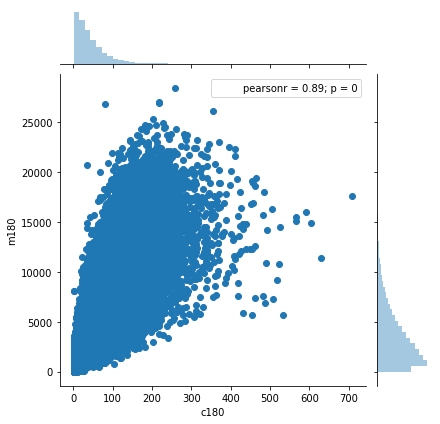

In [6]:
# посмотрим график распределения двух количественных переменных, увидим, что точки сгруппированы очень плотно
sns.jointplot(x = "c180", y = "m180", data = df, kind = "scatter")

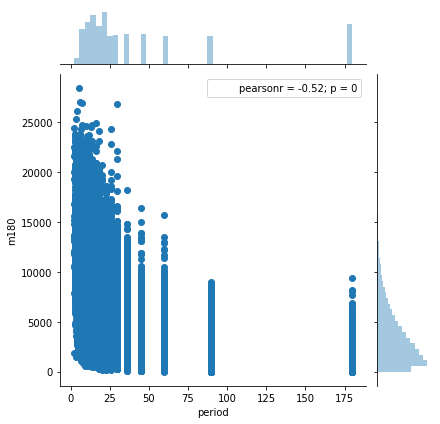

In [7]:
sns.jointplot(x = "period", y = "m180", data = df, kind = "scatter")

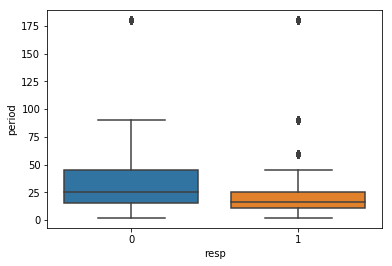

In [8]:
sns.boxplot(x = "resp", y = "period", data = df, orient = "vertical")
# разница заметная

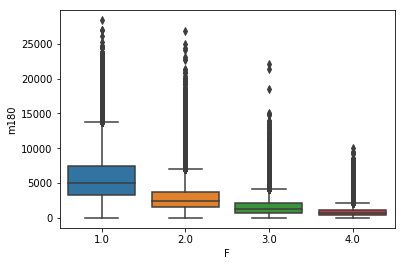

In [9]:
sns.boxplot(x = "F", y = "m180", data = df, orient = "vertical")

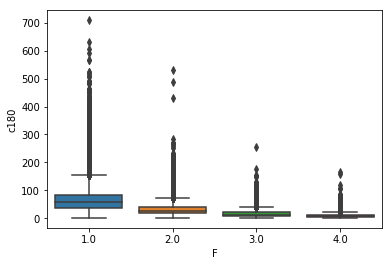

In [10]:
sns.boxplot(x = "F", y = "c180", data = df, orient = "vertical")

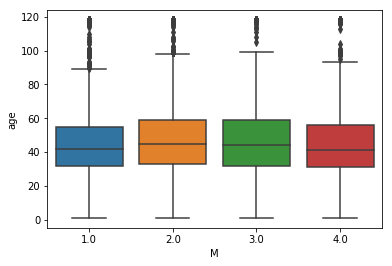

In [11]:
sns.boxplot(x = "M", y = "age", data = df, orient = "vertical")

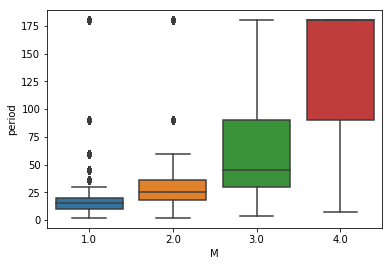

In [12]:
sns.boxplot(x = "M", y = "period", data = df, orient = "vertical")

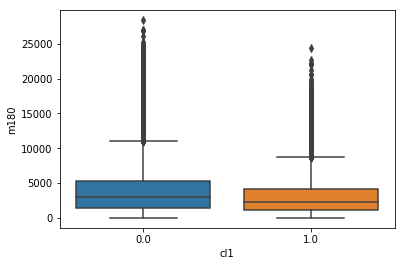

In [13]:
sns.boxplot(x = "cl1", y = "m180", data = df, orient = "vertical")

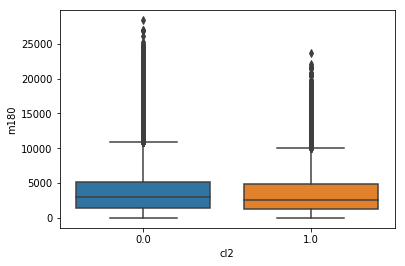

In [14]:
sns.boxplot(x = "cl2", y = "m180", data = df, orient = "vertical")

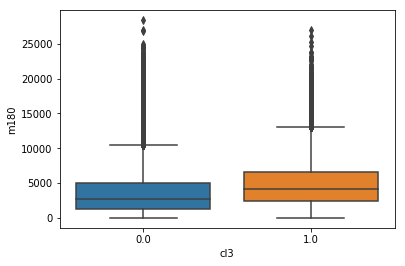

In [15]:
sns.boxplot(x = "cl3", y = "m180", data = df, orient = "vertical")

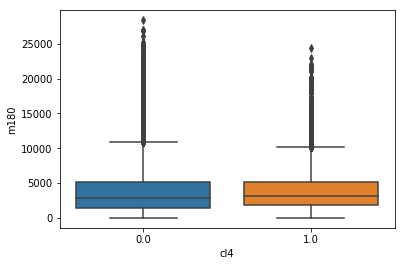

In [16]:
sns.boxplot(x = "cl4", y = "m180", data = df, orient = "vertical")

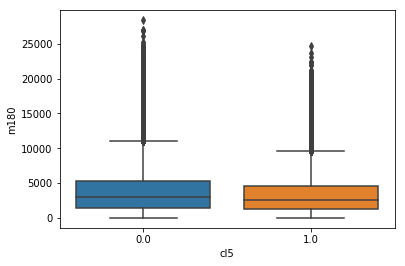

In [17]:
sns.boxplot(x = "cl5", y = "m180", data = df, orient = "vertical")

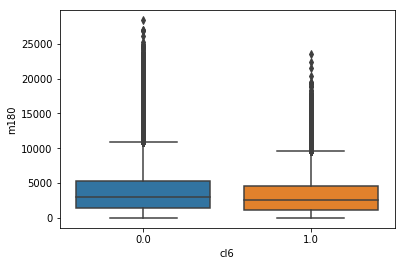

In [18]:
sns.boxplot(x = "cl6", y = "m180", data = df, orient = "vertical")

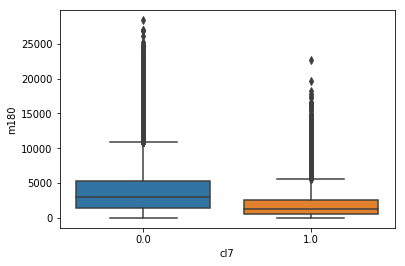

In [19]:
sns.boxplot(x = "cl7", y = "m180", data = df, orient = "vertical")

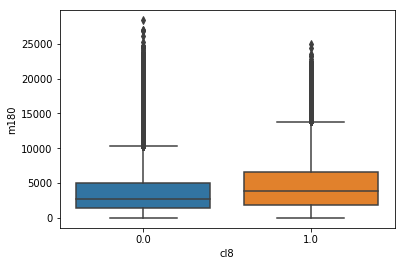

In [20]:
sns.boxplot(x = "cl8", y = "m180", data = df, orient = "vertical")

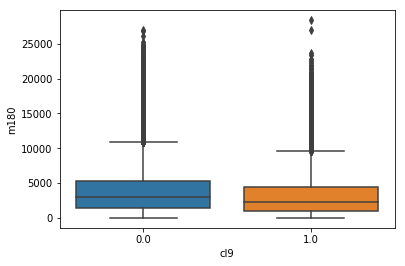

In [21]:
sns.boxplot(x = "cl9", y = "m180", data = df, orient = "vertical")

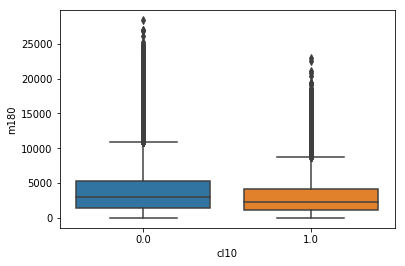

In [22]:
sns.boxplot(x = "cl10", y = "m180", data = df, orient = "vertical")

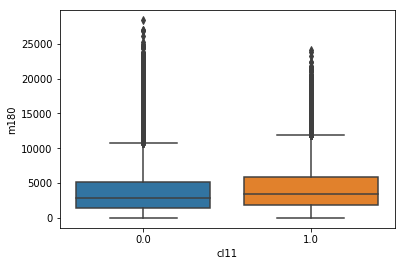

In [23]:
sns.boxplot(x = "cl11", y = "m180", data = df, orient = "vertical")

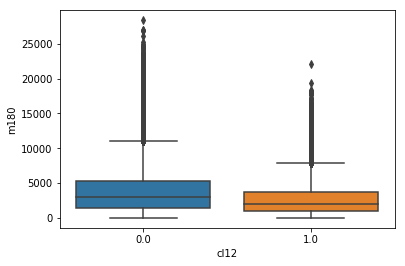

In [24]:
sns.boxplot(x = "cl12", y = "m180", data = df, orient = "vertical")

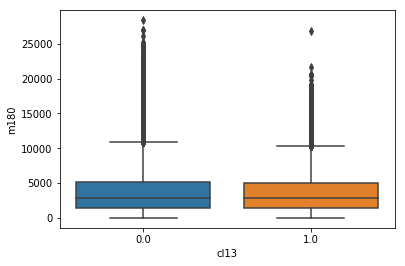

In [25]:
sns.boxplot(x = "cl13", y = "m180", data = df, orient = "vertical")

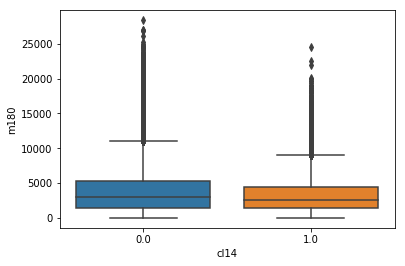

In [26]:
sns.boxplot(x = "cl14", y = "m180", data = df, orient = "vertical")

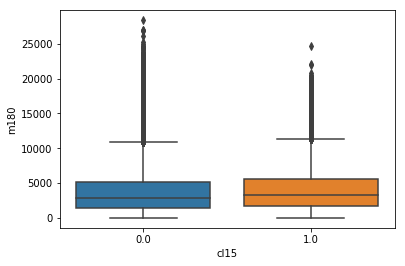

In [27]:
sns.boxplot(x = "cl15", y = "m180", data = df, orient = "vertical")

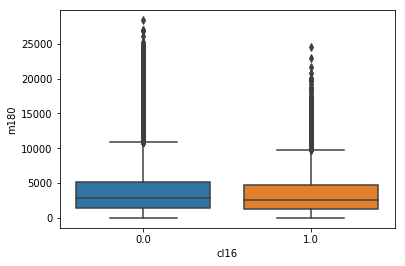

In [28]:
sns.boxplot(x = "cl16", y = "m180", data = df, orient = "vertical")

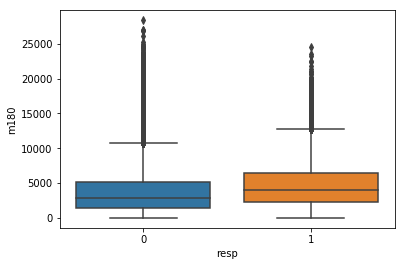

In [29]:
sns.boxplot(x = "resp", y = "m180", data = df, orient="vertical")

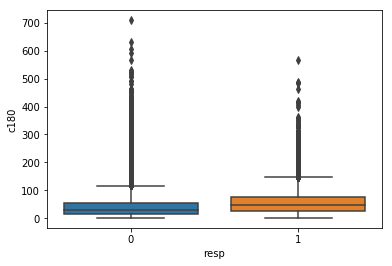

In [30]:
sns.boxplot(x = "resp", y = "c180", data = df, orient="vertical")

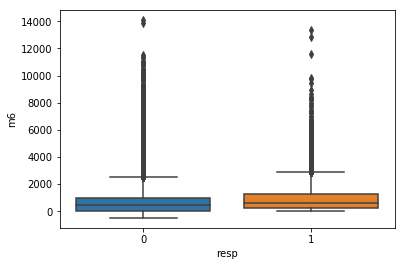

In [31]:
sns.boxplot(x = "resp", y = "m6", data = df, orient="vertical")

In [32]:
# сгенерируем еще несколько дополнительных переменных, отражающих доли трат клиентов помесячно от общего кол-ва за полгода
df["p1"] = df["m1"]/df["m180"]
df["p2"] = df["m2"]/df["m180"]
df["p3"] = df["m3"]/df["m180"]
df["p4"] = df["m4"]/df["m180"]
df["p5"] = df["m5"]/df["m180"]
df["p6"] = df["m6"]/df["m180"]

In [33]:
# сгенерируем еще несколько дополнительных переменных, отражающих доли чеков клиентов помесячно от общего кол-ва за полгода
df["pn1"] = df["n1"]/df["n180"]
df["pn2"] = df["n2"]/df["n180"]
df["pn3"] = df["n3"]/df["n180"]
df["pn4"] = df["n4"]/df["n180"]
df["pn5"] = df["n5"]/df["n180"]
df["pn6"] = df["n6"]/df["n180"]

In [34]:
# сгенерируем еще несколько дополнительных переменных, отражающих доли покупок в штуках клиентов помесячно от общего кол-ва за полгода
df["pc1"] = df["c1"]/df["c180"]
df["pc2"] = df["c2"]/df["c180"]
df["pc3"] = df["c3"]/df["c180"]
df["pc4"] = df["c4"]/df["c180"]
df["pc5"] = df["c5"]/df["c180"]
df["pc6"] = df["c6"]/df["c180"]

In [35]:
df = df.dropna()
from sklearn.cluster import KMeans

In [36]:
df_cluster = df.iloc[:, 47:65]

In [37]:
k10 = KMeans(n_clusters = 10, max_iter = 1000)
k10.fit(df_cluster.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [38]:
cl10 = pd.get_dummies(k10.predict(df_cluster), prefix = "cl")

In [39]:
df = pd.concat([df, cl10], axis = 1)

In [40]:
df.head()

,ID,age,impulse,F,M,c180,m180,period,n180,topDayMonth,...,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5,cl_6,cl_7,cl_8,cl_9
0,2.775000e+12,34.0,1.0,3.0,3.0,7.0,541.0,90.000000,2.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.775000e+12,27.0,1.0,2.0,2.0,24.0,1791.0,25.714286,7.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.775000e+12,23.0,1.0,1.0,2.0,12.0,984.0,22.500000,8.0,15.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.775000e+12,33.0,1.0,1.0,1.0,42.0,5925.0,25.714286,7.0,15.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.775000e+12,40.0,1.0,1.0,1.0,51.0,4863.0,9.000000,20.0,20.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# введем показатель, показывающий людей, не откликающихся в принципе на рассылки (эту информацию из переменной rank мы имеем право вытащить)
df["no_resp"] = df["rank"].apply(lambda x: 1 if (x == 0 or x == 1 or x == 5) else 0)

In [42]:
# введем показатель, разграничивающий людей, предпочитающих ходить в "скидочные" дни от обычных
df["sale_lovers"] = df["topDayMonth"].apply(lambda x: 1 if (x == 15 or 4 < x < 6 or 24 < x < 26) else 0)

In [43]:
df.nunique()

ID             301947
age               116
impulse            11
F                   4
M                   4
c180              429
m180            21948
period             88
n180               80
topDayMonth        31
exp                70
c1                136
m1              32675
n1                 25
c2                144
m2              31927
n2                 25
c3                140
m3              33590
n3                 27
c4                133
m4              39104
n4                 27
c5                138
m5              54952
n5                 28
c6                156
m6              40781
n6                 28
cl1                 2
                ...  
p1             352856
p2             358012
p3             359847
p4             373543
p5             385241
p6             369534
pn1               518
pn2               462
pn3               478
pn4               487
pn5               506
pn6               575
pc1              6465
pc2              6281
pc3       

In [44]:
# введем бинарный показатель, показывающий, относится ли покупатель к новичкам или нет, выполним его анализ
df["novice"] = df["exp"].apply(lambda x: 1 if x < 12 else 0)

In [45]:
df["novice"].value_counts()

0    482569
1    124596
Name: novice, dtype: int64

In [46]:
df.groupby("novice")["m180"].describe().transpose()

novice,0,1
count,457518.000000,124596.000000
mean,4014.438333,2876.056012
std,3165.122987,2861.744925
min,1.000000,3.000000
25%,1665.000000,845.000000
50%,3190.000000,1920.000000
75%,5516.000000,3931.000000
max,26830.000000,28388.000000


In [47]:
df.groupby("sale_lovers")["m180"].describe().transpose()

sale_lovers,0,1
count,459403.000000,122711.000000
mean,3671.017782,4144.260007
std,3108.540584,3216.816722
min,1.000000,4.000000
25%,1351.000000,1745.000000
50%,2809.000000,3333.000000
75%,5072.000000,5691.000000
max,27035.000000,28388.000000


In [48]:
df["sale_lovers"].value_counts()

0    484454
1    122711
Name: sale_lovers, dtype: int64

In [49]:
# уберем переменные, которые мы не можем использовать при построении модели
df2 = df.drop(["m180", "c180", "n180", "rank", "ID"], axis = 1)

In [50]:
df2 = df2.dropna()

In [51]:
df2.shape

(557063, 73)

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(df2, test_size = 0.1, random_state = 1)

In [53]:
# попробуем отбалансировать датасет
from sklearn.utils import resample

In [54]:
df_majority = x_train[x_train.resp == 0]
df_minority = x_train[x_train.resp == 1]

In [55]:
print(df_majority.shape, df_minority.shape)

(470076, 73) (31280, 73)


In [56]:
df_majority_undersampled = resample(df_majority, replace = False, n_samples = df_minority.shape[0], random_state = 1337)

In [57]:
x_train = pd.concat([df_majority_undersampled, df_minority])
x_train.head()

,age,impulse,F,M,period,topDayMonth,exp,c1,m1,n1,...,cl_3,cl_4,cl_5,cl_6,cl_7,cl_8,cl_9,no_resp,sale_lovers,novice
24255,39.0,2.0,1.0,1.0,12.857143,15.0,59.0,3.0,194.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0
412875,32.0,0.0,3.0,3.0,36.000000,15.0,62.0,5.0,500.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0
457280,18.0,1.0,2.0,2.0,36.000000,16.0,10.0,9.0,719.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1
248317,25.0,2.0,1.0,1.0,15.000000,11.0,61.0,1.0,79.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0
478716,42.0,1.0,4.0,4.0,180.000000,19.0,19.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [58]:
x_train.shape

(62560, 73)

In [59]:
x_train = x_train.dropna()

In [60]:
y_train = x_train.resp
y_test = x_test.resp
x_test = x_test.drop("resp", axis = 1)
x_train = x_train.drop("resp", axis = 1)

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 800, max_depth = 7, n_jobs = -1, verbose = 1,
                                  class_weight = "balanced_subsample", random_state = 1337)

In [62]:
rf_model.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:   22.8s finished


RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=7, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=800, n_jobs=-1, oob_score=False,
            random_state=1337, verbose=1, warm_start=False)

In [63]:
y_pred_train = rf_model.predict_proba(x_train)

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    1.2s finished


In [64]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train, y_pred_train[:, 1]))

0.7363288562672928


In [65]:
y_pred_test = rf_model.predict_proba(x_test)

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    1.1s finished


In [66]:
print(roc_auc_score(y_test, y_pred_test[:, 1]))
# точность сносная
# + незначительное падение точности на тестовых данных

0.7213804888870402


In [67]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty = "l2")
logreg.fit(x_train, y_train)
y_logtest = logreg.predict_proba(x_test)
print(roc_auc_score(y_test, y_logtest[:, 1]))
# логистическая регрессия на данном датасете отрабатывает нормально

0.7487436530935138


In [68]:
y_logtrain = logreg.predict_proba(x_train)
print(roc_auc_score(y_train, y_logtrain[:, 1]))

0.7520128553826178


In [69]:
cat_feature_indices = np.where(x_train.nunique() < 32)[0]

In [70]:
import catboost as cb
from catboost import CatBoostClassifier

In [71]:
cb_train = cb.Pool(x_train, label = y_train, cat_features = cat_feature_indices)
cb_test = cb.Pool(x_test, label = y_test, cat_features = cat_feature_indices)

In [72]:
cb_model = CatBoostClassifier(iterations = 4000, learning_rate = 0.06, max_depth = 7, rsm = 0.7,
                             one_hot_max_size = 32, loss_function = "CrossEntropy", 
                              eval_metric = "AUC", random_state = 1337, od_wait = 100,
                             use_best_model = True, od_type = "Iter", verbose = True)

In [73]:
cb_model.fit(cb_train, eval_set = cb_test)

0:	test: 0.7176358	best: 0.7176358 (0)	total: 120ms	remaining: 8m
1:	test: 0.7174278	best: 0.7176358 (0)	total: 187ms	remaining: 6m 12s
2:	test: 0.7182864	best: 0.7182864 (2)	total: 251ms	remaining: 5m 34s
3:	test: 0.7262079	best: 0.7262079 (3)	total: 317ms	remaining: 5m 16s
4:	test: 0.7263731	best: 0.7263731 (4)	total: 390ms	remaining: 5m 11s
5:	test: 0.7272257	best: 0.7272257 (5)	total: 456ms	remaining: 5m 3s
6:	test: 0.7273727	best: 0.7273727 (6)	total: 521ms	remaining: 4m 57s
7:	test: 0.7292232	best: 0.7292232 (7)	total: 588ms	remaining: 4m 53s
8:	test: 0.7293122	best: 0.7293122 (8)	total: 659ms	remaining: 4m 52s
9:	test: 0.7293859	best: 0.7293859 (9)	total: 726ms	remaining: 4m 49s
10:	test: 0.7299321	best: 0.7299321 (10)	total: 794ms	remaining: 4m 47s
11:	test: 0.7308131	best: 0.7308131 (11)	total: 861ms	remaining: 4m 46s
12:	test: 0.7315576	best: 0.7315576 (12)	total: 939ms	remaining: 4m 47s
13:	test: 0.7324363	best: 0.7324363 (13)	total: 1.01s	remaining: 4m 47s
14:	test: 0.73250

116:	test: 0.7524272	best: 0.7524272 (116)	total: 8.42s	remaining: 4m 39s
117:	test: 0.7525101	best: 0.7525101 (117)	total: 8.49s	remaining: 4m 39s
118:	test: 0.7526179	best: 0.7526179 (118)	total: 8.56s	remaining: 4m 39s
119:	test: 0.7526844	best: 0.7526844 (119)	total: 8.63s	remaining: 4m 38s
120:	test: 0.7526608	best: 0.7526844 (119)	total: 8.7s	remaining: 4m 38s
121:	test: 0.7527647	best: 0.7527647 (121)	total: 8.77s	remaining: 4m 38s
122:	test: 0.7528220	best: 0.7528220 (122)	total: 8.84s	remaining: 4m 38s
123:	test: 0.7529387	best: 0.7529387 (123)	total: 8.92s	remaining: 4m 38s
124:	test: 0.7530343	best: 0.7530343 (124)	total: 8.99s	remaining: 4m 38s
125:	test: 0.7530963	best: 0.7530963 (125)	total: 9.06s	remaining: 4m 38s
126:	test: 0.7531181	best: 0.7531181 (126)	total: 9.13s	remaining: 4m 38s
127:	test: 0.7532308	best: 0.7532308 (127)	total: 9.2s	remaining: 4m 38s
128:	test: 0.7532709	best: 0.7532709 (128)	total: 9.27s	remaining: 4m 38s
129:	test: 0.7533698	best: 0.7533698 (12

227:	test: 0.7588394	best: 0.7588394 (227)	total: 16.9s	remaining: 4m 40s
228:	test: 0.7588223	best: 0.7588394 (227)	total: 17s	remaining: 4m 40s
229:	test: 0.7589366	best: 0.7589366 (229)	total: 17.1s	remaining: 4m 40s
230:	test: 0.7589592	best: 0.7589592 (230)	total: 17.2s	remaining: 4m 39s
231:	test: 0.7589587	best: 0.7589592 (230)	total: 17.2s	remaining: 4m 39s
232:	test: 0.7590071	best: 0.7590071 (232)	total: 17.3s	remaining: 4m 39s
233:	test: 0.7590470	best: 0.7590470 (233)	total: 17.4s	remaining: 4m 39s
234:	test: 0.7591424	best: 0.7591424 (234)	total: 17.4s	remaining: 4m 39s
235:	test: 0.7591709	best: 0.7591709 (235)	total: 17.5s	remaining: 4m 39s
236:	test: 0.7591647	best: 0.7591709 (235)	total: 17.6s	remaining: 4m 39s
237:	test: 0.7591455	best: 0.7591709 (235)	total: 17.6s	remaining: 4m 38s
238:	test: 0.7590957	best: 0.7591709 (235)	total: 17.7s	remaining: 4m 38s
239:	test: 0.7590742	best: 0.7591709 (235)	total: 17.8s	remaining: 4m 38s
240:	test: 0.7591110	best: 0.7591709 (23

341:	test: 0.7635369	best: 0.7635549 (339)	total: 25s	remaining: 4m 27s
342:	test: 0.7636217	best: 0.7636217 (342)	total: 25.1s	remaining: 4m 27s
343:	test: 0.7636059	best: 0.7636217 (342)	total: 25.2s	remaining: 4m 27s
344:	test: 0.7636604	best: 0.7636604 (344)	total: 25.2s	remaining: 4m 27s
345:	test: 0.7637092	best: 0.7637092 (345)	total: 25.3s	remaining: 4m 27s
346:	test: 0.7638056	best: 0.7638056 (346)	total: 25.4s	remaining: 4m 27s
347:	test: 0.7638531	best: 0.7638531 (347)	total: 25.4s	remaining: 4m 27s
348:	test: 0.7638656	best: 0.7638656 (348)	total: 25.5s	remaining: 4m 26s
349:	test: 0.7638732	best: 0.7638732 (349)	total: 25.6s	remaining: 4m 26s
350:	test: 0.7639551	best: 0.7639551 (350)	total: 25.7s	remaining: 4m 26s
351:	test: 0.7639541	best: 0.7639551 (350)	total: 25.7s	remaining: 4m 26s
352:	test: 0.7639689	best: 0.7639689 (352)	total: 25.8s	remaining: 4m 26s
353:	test: 0.7639732	best: 0.7639732 (353)	total: 25.9s	remaining: 4m 26s
354:	test: 0.7640798	best: 0.7640798 (35

455:	test: 0.7668737	best: 0.7668737 (455)	total: 33.7s	remaining: 4m 22s
456:	test: 0.7668400	best: 0.7668737 (455)	total: 33.8s	remaining: 4m 22s
457:	test: 0.7668444	best: 0.7668737 (455)	total: 33.9s	remaining: 4m 21s
458:	test: 0.7668718	best: 0.7668737 (455)	total: 33.9s	remaining: 4m 21s
459:	test: 0.7669308	best: 0.7669308 (459)	total: 34s	remaining: 4m 21s
460:	test: 0.7669628	best: 0.7669628 (460)	total: 34.1s	remaining: 4m 21s
461:	test: 0.7670255	best: 0.7670255 (461)	total: 34.2s	remaining: 4m 21s
462:	test: 0.7670619	best: 0.7670619 (462)	total: 34.2s	remaining: 4m 21s
463:	test: 0.7671940	best: 0.7671940 (463)	total: 34.3s	remaining: 4m 21s
464:	test: 0.7672491	best: 0.7672491 (464)	total: 34.4s	remaining: 4m 21s
465:	test: 0.7672937	best: 0.7672937 (465)	total: 34.4s	remaining: 4m 21s
466:	test: 0.7673704	best: 0.7673704 (466)	total: 34.5s	remaining: 4m 21s
467:	test: 0.7673878	best: 0.7673878 (467)	total: 34.6s	remaining: 4m 20s
468:	test: 0.7673884	best: 0.7673884 (46

566:	test: 0.7698192	best: 0.7698192 (566)	total: 41.6s	remaining: 4m 11s
567:	test: 0.7698192	best: 0.7698192 (566)	total: 41.6s	remaining: 4m 11s
568:	test: 0.7698380	best: 0.7698380 (568)	total: 41.7s	remaining: 4m 11s
569:	test: 0.7698645	best: 0.7698645 (569)	total: 41.8s	remaining: 4m 11s
570:	test: 0.7698500	best: 0.7698645 (569)	total: 41.9s	remaining: 4m 11s
571:	test: 0.7698934	best: 0.7698934 (571)	total: 41.9s	remaining: 4m 11s
572:	test: 0.7698886	best: 0.7698934 (571)	total: 42s	remaining: 4m 11s
573:	test: 0.7699243	best: 0.7699243 (573)	total: 42.1s	remaining: 4m 11s
574:	test: 0.7699389	best: 0.7699389 (574)	total: 42.1s	remaining: 4m 10s
575:	test: 0.7699277	best: 0.7699389 (574)	total: 42.2s	remaining: 4m 10s
576:	test: 0.7698799	best: 0.7699389 (574)	total: 42.3s	remaining: 4m 10s
577:	test: 0.7698562	best: 0.7699389 (574)	total: 42.3s	remaining: 4m 10s
578:	test: 0.7698968	best: 0.7699389 (574)	total: 42.4s	remaining: 4m 10s
579:	test: 0.7699093	best: 0.7699389 (57

680:	test: 0.7719861	best: 0.7720011 (679)	total: 50.3s	remaining: 4m 5s
681:	test: 0.7720284	best: 0.7720284 (681)	total: 50.4s	remaining: 4m 4s
682:	test: 0.7719973	best: 0.7720284 (681)	total: 50.4s	remaining: 4m 4s
683:	test: 0.7719742	best: 0.7720284 (681)	total: 50.5s	remaining: 4m 4s
684:	test: 0.7720494	best: 0.7720494 (684)	total: 50.6s	remaining: 4m 4s
685:	test: 0.7720327	best: 0.7720494 (684)	total: 50.6s	remaining: 4m 4s
686:	test: 0.7720542	best: 0.7720542 (686)	total: 50.7s	remaining: 4m 4s
687:	test: 0.7720946	best: 0.7720946 (687)	total: 50.8s	remaining: 4m 4s
688:	test: 0.7720714	best: 0.7720946 (687)	total: 50.9s	remaining: 4m 4s
689:	test: 0.7721370	best: 0.7721370 (689)	total: 50.9s	remaining: 4m 4s
690:	test: 0.7721387	best: 0.7721387 (690)	total: 51s	remaining: 4m 4s
691:	test: 0.7721663	best: 0.7721663 (691)	total: 51.1s	remaining: 4m 4s
692:	test: 0.7721908	best: 0.7721908 (692)	total: 51.1s	remaining: 4m 3s
693:	test: 0.7722436	best: 0.7722436 (693)	total: 51.

794:	test: 0.7737909	best: 0.7738281 (792)	total: 58.3s	remaining: 3m 55s
795:	test: 0.7737817	best: 0.7738281 (792)	total: 58.4s	remaining: 3m 55s
796:	test: 0.7737732	best: 0.7738281 (792)	total: 58.5s	remaining: 3m 55s
797:	test: 0.7738039	best: 0.7738281 (792)	total: 58.6s	remaining: 3m 54s
798:	test: 0.7737851	best: 0.7738281 (792)	total: 58.6s	remaining: 3m 54s
799:	test: 0.7737835	best: 0.7738281 (792)	total: 58.7s	remaining: 3m 54s
800:	test: 0.7738529	best: 0.7738529 (800)	total: 58.8s	remaining: 3m 54s
801:	test: 0.7738634	best: 0.7738634 (801)	total: 58.8s	remaining: 3m 54s
802:	test: 0.7738701	best: 0.7738701 (802)	total: 58.9s	remaining: 3m 54s
803:	test: 0.7738942	best: 0.7738942 (803)	total: 59s	remaining: 3m 54s
804:	test: 0.7739888	best: 0.7739888 (804)	total: 59.1s	remaining: 3m 54s
805:	test: 0.7739946	best: 0.7739946 (805)	total: 59.2s	remaining: 3m 54s
806:	test: 0.7739990	best: 0.7739990 (806)	total: 59.2s	remaining: 3m 54s
807:	test: 0.7740814	best: 0.7740814 (80

908:	test: 0.7756646	best: 0.7756827 (907)	total: 1m 7s	remaining: 3m 48s
909:	test: 0.7756552	best: 0.7756827 (907)	total: 1m 7s	remaining: 3m 47s
910:	test: 0.7756975	best: 0.7756975 (910)	total: 1m 7s	remaining: 3m 47s
911:	test: 0.7757072	best: 0.7757072 (911)	total: 1m 7s	remaining: 3m 47s
912:	test: 0.7757060	best: 0.7757072 (911)	total: 1m 7s	remaining: 3m 47s
913:	test: 0.7757335	best: 0.7757335 (913)	total: 1m 7s	remaining: 3m 47s
914:	test: 0.7757280	best: 0.7757335 (913)	total: 1m 7s	remaining: 3m 47s
915:	test: 0.7757866	best: 0.7757866 (915)	total: 1m 7s	remaining: 3m 47s
916:	test: 0.7758043	best: 0.7758043 (916)	total: 1m 7s	remaining: 3m 47s
917:	test: 0.7757918	best: 0.7758043 (916)	total: 1m 7s	remaining: 3m 47s
918:	test: 0.7757829	best: 0.7758043 (916)	total: 1m 7s	remaining: 3m 47s
919:	test: 0.7758275	best: 0.7758275 (919)	total: 1m 7s	remaining: 3m 47s
920:	test: 0.7758138	best: 0.7758275 (919)	total: 1m 7s	remaining: 3m 46s
921:	test: 0.7757943	best: 0.7758275 (

1019:	test: 0.7770377	best: 0.7770757 (1017)	total: 1m 15s	remaining: 3m 39s
1020:	test: 0.7770629	best: 0.7770757 (1017)	total: 1m 15s	remaining: 3m 39s
1021:	test: 0.7770261	best: 0.7770757 (1017)	total: 1m 15s	remaining: 3m 39s
1022:	test: 0.7770540	best: 0.7770757 (1017)	total: 1m 15s	remaining: 3m 39s
1023:	test: 0.7770257	best: 0.7770757 (1017)	total: 1m 15s	remaining: 3m 39s
1024:	test: 0.7770633	best: 0.7770757 (1017)	total: 1m 15s	remaining: 3m 39s
1025:	test: 0.7770962	best: 0.7770962 (1025)	total: 1m 15s	remaining: 3m 39s
1026:	test: 0.7771349	best: 0.7771349 (1026)	total: 1m 15s	remaining: 3m 39s
1027:	test: 0.7772158	best: 0.7772158 (1027)	total: 1m 15s	remaining: 3m 39s
1028:	test: 0.7772750	best: 0.7772750 (1028)	total: 1m 15s	remaining: 3m 38s
1029:	test: 0.7773387	best: 0.7773387 (1029)	total: 1m 15s	remaining: 3m 38s
1030:	test: 0.7773666	best: 0.7773666 (1030)	total: 1m 16s	remaining: 3m 38s
1031:	test: 0.7773670	best: 0.7773670 (1031)	total: 1m 16s	remaining: 3m 38s

1127:	test: 0.7780792	best: 0.7781156 (1113)	total: 1m 23s	remaining: 3m 32s
1128:	test: 0.7780788	best: 0.7781156 (1113)	total: 1m 23s	remaining: 3m 32s
1129:	test: 0.7780849	best: 0.7781156 (1113)	total: 1m 23s	remaining: 3m 32s
1130:	test: 0.7780922	best: 0.7781156 (1113)	total: 1m 23s	remaining: 3m 32s
1131:	test: 0.7781152	best: 0.7781156 (1113)	total: 1m 23s	remaining: 3m 32s
1132:	test: 0.7781035	best: 0.7781156 (1113)	total: 1m 23s	remaining: 3m 31s
1133:	test: 0.7780943	best: 0.7781156 (1113)	total: 1m 23s	remaining: 3m 31s
1134:	test: 0.7781348	best: 0.7781348 (1134)	total: 1m 23s	remaining: 3m 31s
1135:	test: 0.7781477	best: 0.7781477 (1135)	total: 1m 23s	remaining: 3m 31s
1136:	test: 0.7781800	best: 0.7781800 (1136)	total: 1m 24s	remaining: 3m 31s
1137:	test: 0.7782128	best: 0.7782128 (1137)	total: 1m 24s	remaining: 3m 31s
1138:	test: 0.7782278	best: 0.7782278 (1138)	total: 1m 24s	remaining: 3m 31s
1139:	test: 0.7782168	best: 0.7782278 (1138)	total: 1m 24s	remaining: 3m 31s

1235:	test: 0.7794936	best: 0.7795072 (1233)	total: 1m 30s	remaining: 3m 23s
1236:	test: 0.7794905	best: 0.7795072 (1233)	total: 1m 30s	remaining: 3m 23s
1237:	test: 0.7794862	best: 0.7795072 (1233)	total: 1m 31s	remaining: 3m 23s
1238:	test: 0.7794546	best: 0.7795072 (1233)	total: 1m 31s	remaining: 3m 23s
1239:	test: 0.7794533	best: 0.7795072 (1233)	total: 1m 31s	remaining: 3m 23s
1240:	test: 0.7794461	best: 0.7795072 (1233)	total: 1m 31s	remaining: 3m 23s
1241:	test: 0.7794460	best: 0.7795072 (1233)	total: 1m 31s	remaining: 3m 22s
1242:	test: 0.7794094	best: 0.7795072 (1233)	total: 1m 31s	remaining: 3m 22s
1243:	test: 0.7794560	best: 0.7795072 (1233)	total: 1m 31s	remaining: 3m 22s
1244:	test: 0.7795122	best: 0.7795122 (1244)	total: 1m 31s	remaining: 3m 22s
1245:	test: 0.7795221	best: 0.7795221 (1245)	total: 1m 31s	remaining: 3m 22s
1246:	test: 0.7794702	best: 0.7795221 (1245)	total: 1m 31s	remaining: 3m 22s
1247:	test: 0.7794619	best: 0.7795221 (1245)	total: 1m 31s	remaining: 3m 22s

1343:	test: 0.7802276	best: 0.7802886 (1340)	total: 1m 38s	remaining: 3m 15s
1344:	test: 0.7803091	best: 0.7803091 (1344)	total: 1m 39s	remaining: 3m 15s
1345:	test: 0.7803333	best: 0.7803333 (1345)	total: 1m 39s	remaining: 3m 15s
1346:	test: 0.7803752	best: 0.7803752 (1346)	total: 1m 39s	remaining: 3m 15s
1347:	test: 0.7803933	best: 0.7803933 (1347)	total: 1m 39s	remaining: 3m 15s
1348:	test: 0.7803721	best: 0.7803933 (1347)	total: 1m 39s	remaining: 3m 15s
1349:	test: 0.7803506	best: 0.7803933 (1347)	total: 1m 39s	remaining: 3m 15s
1350:	test: 0.7803163	best: 0.7803933 (1347)	total: 1m 39s	remaining: 3m 15s
1351:	test: 0.7803447	best: 0.7803933 (1347)	total: 1m 39s	remaining: 3m 14s
1352:	test: 0.7804093	best: 0.7804093 (1352)	total: 1m 39s	remaining: 3m 14s
1353:	test: 0.7804099	best: 0.7804099 (1353)	total: 1m 39s	remaining: 3m 14s
1354:	test: 0.7804150	best: 0.7804150 (1354)	total: 1m 39s	remaining: 3m 14s
1355:	test: 0.7804234	best: 0.7804234 (1355)	total: 1m 39s	remaining: 3m 14s

1451:	test: 0.7806159	best: 0.7807856 (1427)	total: 1m 46s	remaining: 3m 6s
1452:	test: 0.7806354	best: 0.7807856 (1427)	total: 1m 46s	remaining: 3m 6s
1453:	test: 0.7806087	best: 0.7807856 (1427)	total: 1m 46s	remaining: 3m 6s
1454:	test: 0.7806316	best: 0.7807856 (1427)	total: 1m 46s	remaining: 3m 6s
1455:	test: 0.7806234	best: 0.7807856 (1427)	total: 1m 46s	remaining: 3m 6s
1456:	test: 0.7806256	best: 0.7807856 (1427)	total: 1m 46s	remaining: 3m 6s
1457:	test: 0.7805865	best: 0.7807856 (1427)	total: 1m 46s	remaining: 3m 6s
1458:	test: 0.7806055	best: 0.7807856 (1427)	total: 1m 46s	remaining: 3m 6s
1459:	test: 0.7806157	best: 0.7807856 (1427)	total: 1m 47s	remaining: 3m 6s
1460:	test: 0.7806314	best: 0.7807856 (1427)	total: 1m 47s	remaining: 3m 6s
1461:	test: 0.7805962	best: 0.7807856 (1427)	total: 1m 47s	remaining: 3m 6s
1462:	test: 0.7805984	best: 0.7807856 (1427)	total: 1m 47s	remaining: 3m 6s
1463:	test: 0.7805635	best: 0.7807856 (1427)	total: 1m 47s	remaining: 3m 5s
1464:	test: 

1562:	test: 0.7813231	best: 0.7813293 (1556)	total: 1m 54s	remaining: 2m 58s
1563:	test: 0.7813192	best: 0.7813293 (1556)	total: 1m 54s	remaining: 2m 58s
1564:	test: 0.7813212	best: 0.7813293 (1556)	total: 1m 54s	remaining: 2m 58s
1565:	test: 0.7813131	best: 0.7813293 (1556)	total: 1m 54s	remaining: 2m 58s
1566:	test: 0.7812681	best: 0.7813293 (1556)	total: 1m 54s	remaining: 2m 58s
1567:	test: 0.7813028	best: 0.7813293 (1556)	total: 1m 54s	remaining: 2m 58s
1568:	test: 0.7813392	best: 0.7813392 (1568)	total: 1m 54s	remaining: 2m 58s
1569:	test: 0.7813777	best: 0.7813777 (1569)	total: 1m 55s	remaining: 2m 58s
1570:	test: 0.7813905	best: 0.7813905 (1570)	total: 1m 55s	remaining: 2m 58s
1571:	test: 0.7814465	best: 0.7814465 (1571)	total: 1m 55s	remaining: 2m 57s
1572:	test: 0.7814883	best: 0.7814883 (1572)	total: 1m 55s	remaining: 2m 57s
1573:	test: 0.7814458	best: 0.7814883 (1572)	total: 1m 55s	remaining: 2m 57s
1574:	test: 0.7814501	best: 0.7814883 (1572)	total: 1m 55s	remaining: 2m 57s

1670:	test: 0.7815994	best: 0.7816882 (1661)	total: 2m 1s	remaining: 2m 50s
1671:	test: 0.7816105	best: 0.7816882 (1661)	total: 2m 2s	remaining: 2m 49s
1672:	test: 0.7816080	best: 0.7816882 (1661)	total: 2m 2s	remaining: 2m 49s
1673:	test: 0.7816904	best: 0.7816904 (1673)	total: 2m 2s	remaining: 2m 49s
1674:	test: 0.7817021	best: 0.7817021 (1674)	total: 2m 2s	remaining: 2m 49s
1675:	test: 0.7817252	best: 0.7817252 (1675)	total: 2m 2s	remaining: 2m 49s
1676:	test: 0.7817442	best: 0.7817442 (1676)	total: 2m 2s	remaining: 2m 49s
1677:	test: 0.7817285	best: 0.7817442 (1676)	total: 2m 2s	remaining: 2m 49s
1678:	test: 0.7817333	best: 0.7817442 (1676)	total: 2m 2s	remaining: 2m 49s
1679:	test: 0.7817276	best: 0.7817442 (1676)	total: 2m 2s	remaining: 2m 49s
1680:	test: 0.7817403	best: 0.7817442 (1676)	total: 2m 2s	remaining: 2m 49s
1681:	test: 0.7817187	best: 0.7817442 (1676)	total: 2m 2s	remaining: 2m 49s
1682:	test: 0.7817285	best: 0.7817442 (1676)	total: 2m 2s	remaining: 2m 49s
1683:	test: 

1778:	test: 0.7822962	best: 0.7822962 (1778)	total: 2m 10s	remaining: 2m 42s
1779:	test: 0.7822413	best: 0.7822962 (1778)	total: 2m 10s	remaining: 2m 42s
1780:	test: 0.7822289	best: 0.7822962 (1778)	total: 2m 10s	remaining: 2m 42s
1781:	test: 0.7822539	best: 0.7822962 (1778)	total: 2m 10s	remaining: 2m 42s
1782:	test: 0.7822626	best: 0.7822962 (1778)	total: 2m 10s	remaining: 2m 42s
1783:	test: 0.7822453	best: 0.7822962 (1778)	total: 2m 10s	remaining: 2m 42s
1784:	test: 0.7822703	best: 0.7822962 (1778)	total: 2m 10s	remaining: 2m 41s
1785:	test: 0.7823061	best: 0.7823061 (1785)	total: 2m 10s	remaining: 2m 41s
1786:	test: 0.7823372	best: 0.7823372 (1786)	total: 2m 10s	remaining: 2m 41s
1787:	test: 0.7823520	best: 0.7823520 (1787)	total: 2m 10s	remaining: 2m 41s
1788:	test: 0.7823905	best: 0.7823905 (1788)	total: 2m 10s	remaining: 2m 41s
1789:	test: 0.7823484	best: 0.7823905 (1788)	total: 2m 10s	remaining: 2m 41s
1790:	test: 0.7823402	best: 0.7823905 (1788)	total: 2m 10s	remaining: 2m 41s

1886:	test: 0.7827183	best: 0.7827183 (1886)	total: 2m 17s	remaining: 2m 34s
1887:	test: 0.7827269	best: 0.7827269 (1887)	total: 2m 17s	remaining: 2m 33s
1888:	test: 0.7827107	best: 0.7827269 (1887)	total: 2m 17s	remaining: 2m 33s
1889:	test: 0.7827336	best: 0.7827336 (1889)	total: 2m 17s	remaining: 2m 33s
1890:	test: 0.7827246	best: 0.7827336 (1889)	total: 2m 17s	remaining: 2m 33s
1891:	test: 0.7827384	best: 0.7827384 (1891)	total: 2m 17s	remaining: 2m 33s
1892:	test: 0.7827216	best: 0.7827384 (1891)	total: 2m 18s	remaining: 2m 33s
1893:	test: 0.7827474	best: 0.7827474 (1893)	total: 2m 18s	remaining: 2m 33s
1894:	test: 0.7827663	best: 0.7827663 (1894)	total: 2m 18s	remaining: 2m 33s
1895:	test: 0.7827774	best: 0.7827774 (1895)	total: 2m 18s	remaining: 2m 33s
1896:	test: 0.7827736	best: 0.7827774 (1895)	total: 2m 18s	remaining: 2m 33s
1897:	test: 0.7827952	best: 0.7827952 (1897)	total: 2m 18s	remaining: 2m 33s
1898:	test: 0.7828082	best: 0.7828082 (1898)	total: 2m 18s	remaining: 2m 33s

1994:	test: 0.7835514	best: 0.7835514 (1994)	total: 2m 25s	remaining: 2m 26s
1995:	test: 0.7835137	best: 0.7835514 (1994)	total: 2m 25s	remaining: 2m 26s
1996:	test: 0.7834922	best: 0.7835514 (1994)	total: 2m 25s	remaining: 2m 26s
1997:	test: 0.7834806	best: 0.7835514 (1994)	total: 2m 25s	remaining: 2m 26s
1998:	test: 0.7834834	best: 0.7835514 (1994)	total: 2m 26s	remaining: 2m 26s
1999:	test: 0.7835065	best: 0.7835514 (1994)	total: 2m 26s	remaining: 2m 26s
2000:	test: 0.7835228	best: 0.7835514 (1994)	total: 2m 26s	remaining: 2m 26s
2001:	test: 0.7835558	best: 0.7835558 (2001)	total: 2m 26s	remaining: 2m 25s
2002:	test: 0.7835248	best: 0.7835558 (2001)	total: 2m 26s	remaining: 2m 25s
2003:	test: 0.7835155	best: 0.7835558 (2001)	total: 2m 26s	remaining: 2m 25s
2004:	test: 0.7835492	best: 0.7835558 (2001)	total: 2m 26s	remaining: 2m 25s
2005:	test: 0.7835366	best: 0.7835558 (2001)	total: 2m 26s	remaining: 2m 25s
2006:	test: 0.7835169	best: 0.7835558 (2001)	total: 2m 26s	remaining: 2m 25s

2102:	test: 0.7837100	best: 0.7838263 (2068)	total: 2m 33s	remaining: 2m 18s
2103:	test: 0.7836759	best: 0.7838263 (2068)	total: 2m 33s	remaining: 2m 18s
2104:	test: 0.7837122	best: 0.7838263 (2068)	total: 2m 33s	remaining: 2m 18s
2105:	test: 0.7837479	best: 0.7838263 (2068)	total: 2m 33s	remaining: 2m 17s
2106:	test: 0.7836867	best: 0.7838263 (2068)	total: 2m 33s	remaining: 2m 17s
2107:	test: 0.7837136	best: 0.7838263 (2068)	total: 2m 33s	remaining: 2m 17s
2108:	test: 0.7837780	best: 0.7838263 (2068)	total: 2m 33s	remaining: 2m 17s
2109:	test: 0.7837840	best: 0.7838263 (2068)	total: 2m 33s	remaining: 2m 17s
2110:	test: 0.7838266	best: 0.7838266 (2110)	total: 2m 33s	remaining: 2m 17s
2111:	test: 0.7838489	best: 0.7838489 (2111)	total: 2m 33s	remaining: 2m 17s
2112:	test: 0.7838268	best: 0.7838489 (2111)	total: 2m 33s	remaining: 2m 17s
2113:	test: 0.7838334	best: 0.7838489 (2111)	total: 2m 34s	remaining: 2m 17s
2114:	test: 0.7838493	best: 0.7838493 (2114)	total: 2m 34s	remaining: 2m 17s

2210:	test: 0.7843039	best: 0.7843571 (2209)	total: 2m 41s	remaining: 2m 10s
2211:	test: 0.7843218	best: 0.7843571 (2209)	total: 2m 41s	remaining: 2m 10s
2212:	test: 0.7843605	best: 0.7843605 (2212)	total: 2m 41s	remaining: 2m 10s
2213:	test: 0.7843258	best: 0.7843605 (2212)	total: 2m 41s	remaining: 2m 10s
2214:	test: 0.7843129	best: 0.7843605 (2212)	total: 2m 41s	remaining: 2m 10s
2215:	test: 0.7843504	best: 0.7843605 (2212)	total: 2m 41s	remaining: 2m 10s
2216:	test: 0.7843585	best: 0.7843605 (2212)	total: 2m 41s	remaining: 2m 9s
2217:	test: 0.7843377	best: 0.7843605 (2212)	total: 2m 41s	remaining: 2m 9s
2218:	test: 0.7843139	best: 0.7843605 (2212)	total: 2m 41s	remaining: 2m 9s
2219:	test: 0.7843099	best: 0.7843605 (2212)	total: 2m 41s	remaining: 2m 9s
2220:	test: 0.7843578	best: 0.7843605 (2212)	total: 2m 41s	remaining: 2m 9s
2221:	test: 0.7843823	best: 0.7843823 (2221)	total: 2m 41s	remaining: 2m 9s
2222:	test: 0.7843772	best: 0.7843823 (2221)	total: 2m 41s	remaining: 2m 9s
2223:	

2318:	test: 0.7846670	best: 0.7846670 (2318)	total: 2m 48s	remaining: 2m 2s
2319:	test: 0.7846531	best: 0.7846670 (2318)	total: 2m 48s	remaining: 2m 2s
2320:	test: 0.7846165	best: 0.7846670 (2318)	total: 2m 48s	remaining: 2m 1s
2321:	test: 0.7846381	best: 0.7846670 (2318)	total: 2m 48s	remaining: 2m 1s
2322:	test: 0.7846309	best: 0.7846670 (2318)	total: 2m 48s	remaining: 2m 1s
2323:	test: 0.7846223	best: 0.7846670 (2318)	total: 2m 48s	remaining: 2m 1s
2324:	test: 0.7846195	best: 0.7846670 (2318)	total: 2m 48s	remaining: 2m 1s
2325:	test: 0.7846098	best: 0.7846670 (2318)	total: 2m 48s	remaining: 2m 1s
2326:	test: 0.7846229	best: 0.7846670 (2318)	total: 2m 49s	remaining: 2m 1s
2327:	test: 0.7846339	best: 0.7846670 (2318)	total: 2m 49s	remaining: 2m 1s
2328:	test: 0.7846631	best: 0.7846670 (2318)	total: 2m 49s	remaining: 2m 1s
2329:	test: 0.7846668	best: 0.7846670 (2318)	total: 2m 49s	remaining: 2m 1s
2330:	test: 0.7846752	best: 0.7846752 (2330)	total: 2m 49s	remaining: 2m 1s
2331:	test: 

2426:	test: 0.7852101	best: 0.7852204 (2425)	total: 2m 56s	remaining: 1m 54s
2427:	test: 0.7852042	best: 0.7852204 (2425)	total: 2m 56s	remaining: 1m 54s
2428:	test: 0.7852197	best: 0.7852204 (2425)	total: 2m 56s	remaining: 1m 54s
2429:	test: 0.7851829	best: 0.7852204 (2425)	total: 2m 56s	remaining: 1m 54s
2430:	test: 0.7851742	best: 0.7852204 (2425)	total: 2m 56s	remaining: 1m 54s
2431:	test: 0.7851810	best: 0.7852204 (2425)	total: 2m 56s	remaining: 1m 54s
2432:	test: 0.7852137	best: 0.7852204 (2425)	total: 2m 56s	remaining: 1m 53s
2433:	test: 0.7852583	best: 0.7852583 (2433)	total: 2m 56s	remaining: 1m 53s
2434:	test: 0.7852597	best: 0.7852597 (2434)	total: 2m 57s	remaining: 1m 53s
2435:	test: 0.7852402	best: 0.7852597 (2434)	total: 2m 57s	remaining: 1m 53s
2436:	test: 0.7852485	best: 0.7852597 (2434)	total: 2m 57s	remaining: 1m 53s
2437:	test: 0.7852555	best: 0.7852597 (2434)	total: 2m 57s	remaining: 1m 53s
2438:	test: 0.7852447	best: 0.7852597 (2434)	total: 2m 57s	remaining: 1m 53s

2534:	test: 0.7855430	best: 0.7855430 (2534)	total: 3m 3s	remaining: 1m 46s
2535:	test: 0.7855420	best: 0.7855430 (2534)	total: 3m 3s	remaining: 1m 46s
2536:	test: 0.7855269	best: 0.7855430 (2534)	total: 3m 3s	remaining: 1m 46s
2537:	test: 0.7855116	best: 0.7855430 (2534)	total: 3m 4s	remaining: 1m 46s
2538:	test: 0.7855269	best: 0.7855430 (2534)	total: 3m 4s	remaining: 1m 45s
2539:	test: 0.7855200	best: 0.7855430 (2534)	total: 3m 4s	remaining: 1m 45s
2540:	test: 0.7855109	best: 0.7855430 (2534)	total: 3m 4s	remaining: 1m 45s
2541:	test: 0.7855076	best: 0.7855430 (2534)	total: 3m 4s	remaining: 1m 45s
2542:	test: 0.7855020	best: 0.7855430 (2534)	total: 3m 4s	remaining: 1m 45s
2543:	test: 0.7855119	best: 0.7855430 (2534)	total: 3m 4s	remaining: 1m 45s
2544:	test: 0.7855229	best: 0.7855430 (2534)	total: 3m 4s	remaining: 1m 45s
2545:	test: 0.7854998	best: 0.7855430 (2534)	total: 3m 4s	remaining: 1m 45s
2546:	test: 0.7855128	best: 0.7855430 (2534)	total: 3m 4s	remaining: 1m 45s
2547:	test: 

2642:	test: 0.7855710	best: 0.7857304 (2578)	total: 3m 11s	remaining: 1m 38s
2643:	test: 0.7855534	best: 0.7857304 (2578)	total: 3m 12s	remaining: 1m 38s
2644:	test: 0.7855744	best: 0.7857304 (2578)	total: 3m 12s	remaining: 1m 38s
2645:	test: 0.7856006	best: 0.7857304 (2578)	total: 3m 12s	remaining: 1m 38s
2646:	test: 0.7855791	best: 0.7857304 (2578)	total: 3m 12s	remaining: 1m 38s
2647:	test: 0.7855810	best: 0.7857304 (2578)	total: 3m 12s	remaining: 1m 38s
2648:	test: 0.7855663	best: 0.7857304 (2578)	total: 3m 12s	remaining: 1m 38s
2649:	test: 0.7855545	best: 0.7857304 (2578)	total: 3m 12s	remaining: 1m 38s
2650:	test: 0.7855694	best: 0.7857304 (2578)	total: 3m 12s	remaining: 1m 37s
2651:	test: 0.7855503	best: 0.7857304 (2578)	total: 3m 12s	remaining: 1m 37s
2652:	test: 0.7856000	best: 0.7857304 (2578)	total: 3m 12s	remaining: 1m 37s
2653:	test: 0.7856255	best: 0.7857304 (2578)	total: 3m 12s	remaining: 1m 37s
2654:	test: 0.7856314	best: 0.7857304 (2578)	total: 3m 12s	remaining: 1m 37s

In [74]:
cb_pred = cb_model.predict_proba(cb_test)

In [75]:
from sklearn import metrics

In [76]:
metrics.roc_auc_score(y_test, cb_pred[:, 1])

0.7857303847549677

In [77]:
cb_model.score(x_train, y_train)

0.9153452685421994

In [78]:
# when in doubt - use xgboost
import xgboost as xgb

In [79]:
xg_train = xgb.DMatrix(x_train, label = y_train)
xg_test = xgb.DMatrix(x_test, label = y_test)

In [80]:
xgb_model = xgb.XGBClassifier(max_depth = 7, learning_rate = 0.06, n_estimators = 700, base_score = 0.5,
                             silent = True, subsample = 0.8, colsample_bytree = 0.7, random_state = 1337)

In [82]:
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.06, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=700,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=1337, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8)

In [83]:
xg_pred = xgb_model.predict_proba(x_test)

In [84]:
metrics.roc_auc_score(y_test, xg_pred[:, 1])

0.784024692495118

По итогу можно сказать, что наилучшим образом на этих данных отрабатывает настроенная реализация алгоритма CatBoost. Она же используется и в реальности для построения данной модели.

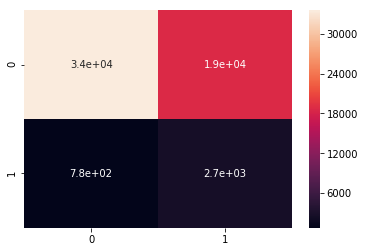

In [87]:
cb_pred_class = cb_model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, cb_pred_class)
sns.heatmap(cm, annot = True)